<a href="https://colab.research.google.com/github/BeforeTheStorm202/NT230.N22.ATCL-Group5/blob/main/Doc2Vec_MLP_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import 

In [2]:
import os
import pickle
import pandas as pd

# model lib
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# evaluation metrisc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# define evaluation function
def evaluation(y_test, y_pred):
  print('Misclassified samples: %d' % (y_test != y_pred).sum())
  result = confusion_matrix(y_test, y_pred, normalize='true')
  #print("Confusion Matrix:")
  #print(result)
  sns.heatmap(result, annot=True)
  result1 = classification_report(y_test, y_pred)
  print("Classification Report:",)
  print (result1)
  result2 = 100* accuracy_score(y_test, y_pred)
  print("Accuracy:", result2)
  result3 = precision_score(y_test, y_pred, average='weighted')
  print("Precision:",result3)
  result4 = recall_score(y_test, y_pred, average='weighted')
  print("Recall:",result4)
  result5 = f1_score(y_test, y_pred, average='weighted')
  print("F1:",result5)

# Load dataset

## Trainset

In [27]:
x_train = pd.read_csv('/content/drive/MyDrive/Malware/Dataset/datatrain_official.csv', header=None)

In [28]:
x_train.shape

(12000, 401)

In [11]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.724374,0.723130,1.742111,-0.341297,-0.162678,-2.806555,2.047710,3.283168,-0.697285,-1.038879,...,-1.850715,0.285391,-1.608882,2.086394,-1.093293,0.455736,-2.401511,-1.931166,0.443629,0
1,-1.350686,1.933452,0.693955,-1.170800,-0.252616,-2.377649,0.337246,1.503177,-1.287510,-1.743109,...,0.293394,1.532014,-0.777892,0.277946,0.080310,-0.283706,-0.364489,-2.341404,0.165316,0
2,-0.091339,1.384228,0.553626,-1.283343,0.185788,-1.350078,2.509072,1.960202,-0.820504,-0.632669,...,0.747580,0.637372,-0.381482,1.234511,-0.334936,-2.347271,0.329604,-1.540294,0.685003,0
3,0.335801,1.218206,2.223142,-0.454021,-1.171166,-0.148812,-0.868848,2.005006,-0.824708,0.140942,...,-0.833137,-0.850778,-1.550518,0.528352,0.856441,-0.202574,-0.303891,0.525991,0.174881,0
4,-0.074732,0.640572,1.345869,-0.579004,-0.786756,0.183880,0.799201,1.103407,-1.288393,-0.896608,...,-0.805804,0.065370,0.889342,0.695457,0.733308,-1.310849,0.564230,-1.084652,0.818661,0


In [14]:
y_train = x_train.iloc[:, -1] #label

In [15]:
y_train.shape

(12000,)

In [20]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: 400, dtype: int64

Remove label from x_train and check the shape again

In [29]:
x_train = x_train.iloc[:, :-1] #remove the label column

In [30]:
x_train.shape

(12000, 400)

In [21]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-0.724374,0.723130,1.742111,-0.341297,-0.162678,-2.806555,2.047710,3.283168,-0.697285,-1.038879,...,1.005829,-1.850715,0.285391,-1.608882,2.086394,-1.093293,0.455736,-2.401511,-1.931166,0.443629
1,-1.350686,1.933452,0.693955,-1.170800,-0.252616,-2.377649,0.337246,1.503177,-1.287510,-1.743109,...,1.432678,0.293394,1.532014,-0.777892,0.277946,0.080310,-0.283706,-0.364489,-2.341404,0.165316
2,-0.091339,1.384228,0.553626,-1.283343,0.185788,-1.350078,2.509072,1.960202,-0.820504,-0.632669,...,-0.624888,0.747580,0.637372,-0.381482,1.234511,-0.334936,-2.347271,0.329604,-1.540294,0.685003
3,0.335801,1.218206,2.223142,-0.454021,-1.171166,-0.148812,-0.868848,2.005006,-0.824708,0.140942,...,1.336496,-0.833137,-0.850778,-1.550518,0.528352,0.856441,-0.202574,-0.303891,0.525991,0.174881
4,-0.074732,0.640572,1.345869,-0.579004,-0.786756,0.183880,0.799201,1.103407,-1.288393,-0.896608,...,-0.892411,-0.805804,0.065370,0.889342,0.695457,0.733308,-1.310849,0.564230,-1.084652,0.818661


## Testset

In [26]:
x_test = pd.read_csv('/content/drive/MyDrive/Malware/Dataset/data_test_official.csv', header=None)

In [31]:
x_test.shape

(8000, 401)

In [32]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.888542,1.575895,1.275043,-0.450827,-0.627840,-0.167262,1.223774,0.768170,-1.719472,-0.557034,...,0.637701,-0.650977,-0.308668,0.811133,0.426760,-0.912017,-0.729158,0.457426,0.349104,0
1,1.429316,0.566058,2.710664,0.342154,-1.275048,-0.684542,-1.773883,0.495921,-2.256503,1.524341,...,0.547909,-1.514846,-2.025887,2.312077,2.481312,-1.731262,-0.724005,-3.118957,-1.686438,0
2,0.455764,-0.027919,0.554645,-0.093089,-0.385095,-0.940665,-0.310667,0.977417,0.270414,-0.276273,...,0.775876,0.625807,0.190820,0.527961,-0.770114,-1.298471,0.917654,-0.893460,0.632201,0
3,-2.831887,2.639645,0.471660,-2.699237,-0.868941,0.014470,-4.027186,-1.890898,2.613427,-3.761578,...,1.861916,2.231529,0.649966,1.375158,2.932686,2.038053,1.000207,-0.104840,-1.268161,0
4,-0.406750,2.307284,-0.086177,-0.404274,-0.489995,-1.025793,-0.120251,0.877978,0.038249,-0.592351,...,-0.396082,1.041470,-1.030861,-0.734761,0.375494,-0.344731,-0.534011,-0.745580,-0.700370,0


In [33]:
y_test = x_test.iloc[:, -1] #label

In [34]:
y_test.shape

(8000,)

In [35]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: 400, dtype: int64

Remove label from x_train and check the shape again

In [36]:
x_test = x_test.iloc[:, :-1] #remove the label column

In [37]:
x_test.shape

(8000, 400)

In [39]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-0.888542,1.575895,1.275043,-0.450827,-0.627840,-0.167262,1.223774,0.768170,-1.719472,-0.557034,...,-0.221378,0.637701,-0.650977,-0.308668,0.811133,0.426760,-0.912017,-0.729158,0.457426,0.349104
1,1.429316,0.566058,2.710664,0.342154,-1.275048,-0.684542,-1.773883,0.495921,-2.256503,1.524341,...,-1.571214,0.547909,-1.514846,-2.025887,2.312077,2.481312,-1.731262,-0.724005,-3.118957,-1.686438
2,0.455764,-0.027919,0.554645,-0.093089,-0.385095,-0.940665,-0.310667,0.977417,0.270414,-0.276273,...,-0.381113,0.775876,0.625807,0.190820,0.527961,-0.770114,-1.298471,0.917654,-0.893460,0.632201
3,-2.831887,2.639645,0.471660,-2.699237,-0.868941,0.014470,-4.027186,-1.890898,2.613427,-3.761578,...,-0.471033,1.861916,2.231529,0.649966,1.375158,2.932686,2.038053,1.000207,-0.104840,-1.268161
4,-0.406750,2.307284,-0.086177,-0.404274,-0.489995,-1.025793,-0.120251,0.877978,0.038249,-0.592351,...,-0.559309,-0.396082,1.041470,-1.030861,-0.734761,0.375494,-0.344731,-0.534011,-0.745580,-0.700370


# Train model

## MLP

In [23]:
mlp = MLPClassifier(solver='adam', max_iter=40, random_state=1)

In [24]:
mlp.fit(x_train, y_train)

MLPClassifier(max_iter=40, random_state=1)

Misclassified samples: 0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

Accuracy: 100.0
Precision: 1.0
Recall: 1.0
F1: 1.0


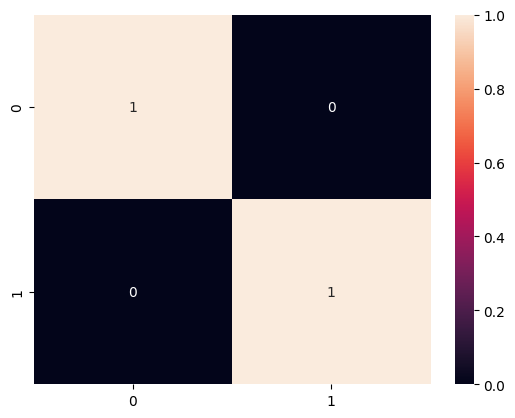

In [47]:
evaluation(y_train, mlp.predict(x_train))

## XGB

In [42]:
# create model instance
xgb = XGBClassifier(min_child_weight = 11, subsample= 0.5, colsample_bytree= 0.7)

In [43]:
# fit model
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=11, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Misclassified samples: 1
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

Accuracy: 99.99166666666667
Precision: 0.999916680553241
Recall: 0.9999166666666667
F1: 0.9999166666660879


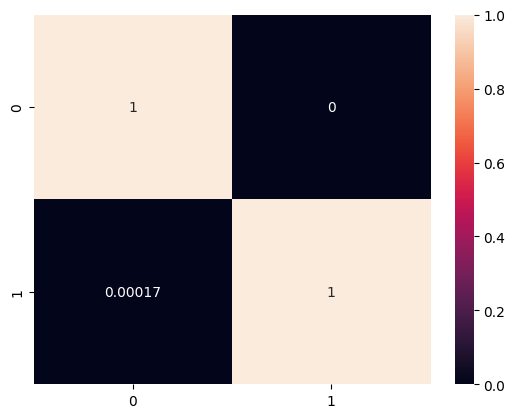

In [46]:
evaluation(y_train, xgb.predict(x_train))

# Predict & evalute on testset

## MLP

In [40]:
y_pred = mlp.predict(x_test)

Misclassified samples: 6
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Accuracy: 99.925
Precision: 0.9992501248125312
Recall: 0.99925
F1: 0.999249999953125


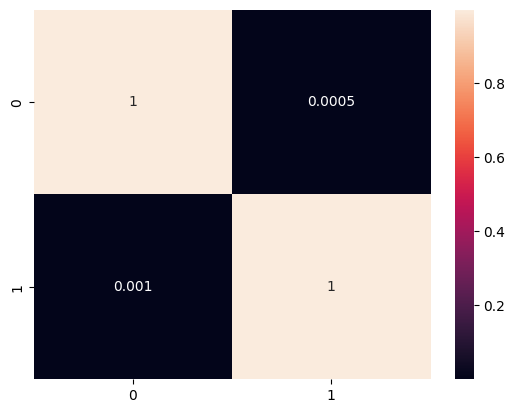

In [41]:
evaluation(y_test, y_pred)

## XGB

In [44]:
# make predictions
preds = xgb.predict(x_test)

Misclassified samples: 46
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4000
           1       0.99      1.00      0.99      4000

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000

Accuracy: 99.425
Precision: 0.9942600087651774
Recall: 0.99425
F1: 0.9942499708904777


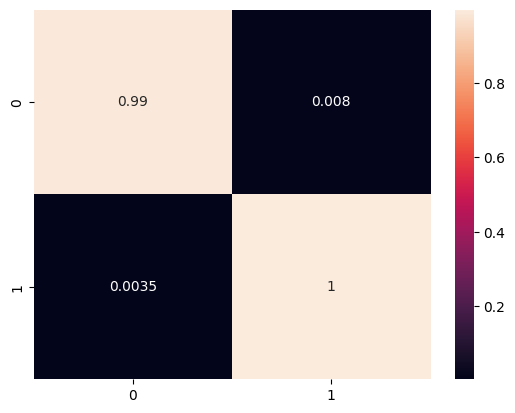

In [45]:
evaluation(y_test, preds)

# Save model

In [48]:
with open('/content/drive/MyDrive/Models/Doc2Vec_MLP', 'wb') as f:
  pickle.dump(mlp, f)

In [49]:
with open('/content/drive/MyDrive/Models/Doc2Vec_XGB', 'wb') as f:
  pickle.dump(xgb, f)